In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigvalsh, eigh

import algo
import utils
import interactions
import dicke

In [2]:
def ising_mag(J0s, wz, alpha, gs, beta, N, M):
    return np.abs(np.array([algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)[0] for J0 in J0s]))

[ 8.99854601e-06 -1.46239092e-04 -1.59201379e-04  8.16153675e-06
 -5.68021121e-06  1.35276872e-03  4.26861842e-03 -5.57582141e-02]
[ 1.07483260e-05 -2.05668999e-04 -1.56410185e-04  1.49936716e-05
  3.33991894e-06  1.50446469e-03  5.17496302e-03 -8.50376930e-02]
[ 1.14350511e-05 -6.98375162e-05 -2.65983416e-04 -4.28228238e-06
  1.78532446e-05  1.71131990e-03  5.49706011e-03 -1.19202736e-01]
[ 1.12668755e-05 -2.54854987e-04 -9.20334412e-05  1.30074305e-05
  1.27025157e-05  1.47197788e-03  5.48057637e-03 -1.57426408e-01]
[ 1.05886421e-05 -1.96820159e-04 -1.61499077e-04  1.53115492e-05
  4.16004962e-06  1.39346793e-03  5.13492511e-03 -1.98176472e-01]
[ 9.70415519e-06 -1.88536969e-04 -1.37336357e-04  6.70210444e-06
  1.09813447e-05  1.88448801e-03  4.47802806e-03 -2.40052590e-01]
[ 8.79477234e-06 -1.88562561e-04 -9.54020807e-05  1.00669947e-05
 -1.57366068e-07  1.30580029e-03  4.18708297e-03 -2.82201837e-01]
[ 7.94302188e-06  1.92841550e-05 -1.89817629e-04  6.21014351e-06
 -4.68237165e-06  

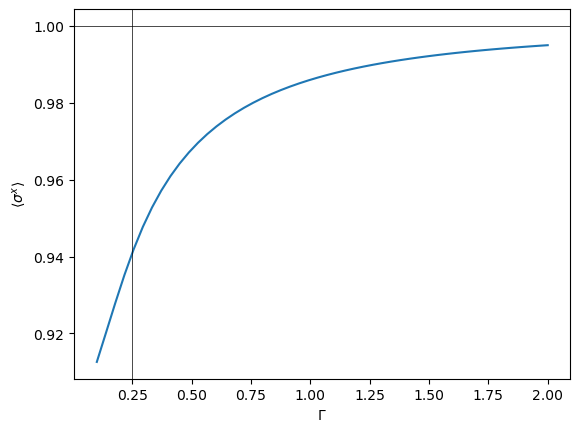

In [7]:
N = 10
M = int(np.sqrt(N) * np.log(N))
beta = 10
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.3

gs = 0.00 * np.ones(N)
gs[:N//2] = 1

J = interactions.powerlaw_pbc(N, alpha)
J = interactions.shift(J, 0.0)

mags = []
for J0 in J0s:
    J = J0 * interactions.rescale(J)
    ws, lams = utils.dicke_from_ising(J, 1e-6)
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags.append(dicke.mag_longitudinal_hessian_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)[0])
mags = np.abs(np.array(mags))

plt.plot(J0s, mags)
plt.axvline(0.25, c='k', lw=0.5)
plt.axhline(1.00, c='k', lw=0.5)
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')
plt.show()

Rounds to go: 2, current critical point:  0.6241379310344827 ...
Rounds to go: 1, current critical point:  0.659080459770115 ...


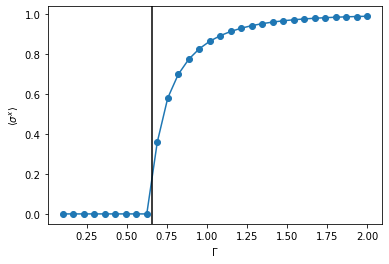

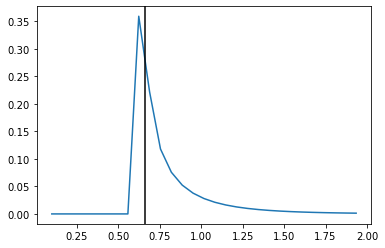

In [4]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 1.25
wz = 1
J0s = np.linspace(0.1, 2, 30)
alpha = 0.5

gs = 0.0 * np.ones(N)

plt.plot(J0s, ising_mag(J0s, wz, alpha, gs, beta, N, M), marker='o')
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')

critical_J0 = utils.critical_point_recursive_refinement(ising_mag, J0s, [wz, alpha, gs, beta, N, M], rounds=3, verbose=True)
plt.axvline(critical_J0, c='k')

plt.show()

op = ising_mag(J0s, wz, alpha, gs, beta, N, M)
rel_diff = (op[1:] - op[:-1])

plt.plot(J0s[:-1], rel_diff)
plt.axvline(critical_J0, c='k')
plt.show()

$\alpha_\chi =$  0.0007568517931777361
[7.56851793e-04 7.15011952e+00]


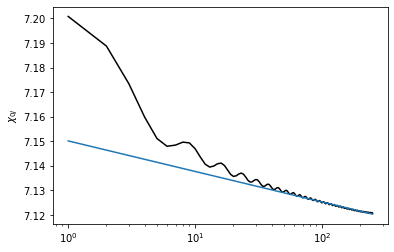

In [82]:
def correlation_length_fit(r, l, A):
    return A * r**(-l) 

N = 500
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 0.05
wz = 1
J0 = 0.25
alpha = 0.7

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0
   
gs = 0.0 * np.ones(N)
mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
gs[i] = dg
mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
susc = ((mxs1 - mxs0) / dg)

rs = np.arange(1, N//2, 1)
fit_start = N//8
fit_rs = np.arange(fit_start, 4*N//8, 1)
plt.plot(rs, susc[1:N//2], c='k')
popt, pcov = curve_fit(correlation_length_fit, fit_rs, susc[fit_start:4*N//8], p0=[1, 1])
print(r'$\alpha_\chi =$ ', popt[0])
print(popt)
plt.plot(rs, correlation_length_fit(rs, *popt))

#ax.axvline(0.25, c='k', lw=0.5)
#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\chi_{0j}$')
plt.show()

0.0008221515108215053 -1.189009267541963e-05


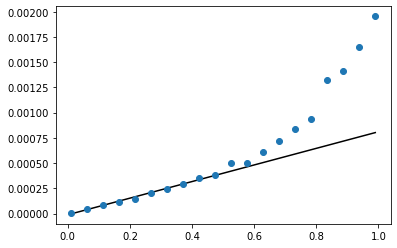

In [84]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 500
M = int(np.sqrt(N) * np.log(N))
wz = 1
beta = 1 / 0.05
J0 = 0.25

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0

alphas = np.linspace(0.01, 0.99, 20)
crit_exp = []
for alpha in alphas:
    gs = 0.0 * np.ones(N)
    mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    gs[i] = dg
    mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    susc = ((mxs1 - mxs0) / dg)

    fit_start = N//8
    #rs = np.arange(1, N//2, 1)
    #ax.plot(rs, susc[1:N//2], c='k')
    popt, pcov = curve_fit(correlation_length_fit, np.arange(fit_start,4*N//8, 1), susc[fit_start:4*N//8], p0=[1, 1])
    crit_exp.append(popt[0])
    
    
def correlation_decay_fit(x, m, n):
    return x*m + n

popt, pcov = curve_fit(correlation_decay_fit, alphas[:2*len(alphas)//4], crit_exp[:2*len(alphas)//4], p0=(1, 0))
print(*popt)
plt.plot(alphas, correlation_decay_fit(alphas, *popt), c='k')
plt.plot(alphas, crit_exp, lw=0, marker='o')
plt.show()

In [60]:
0.670866014377453
0.6635922496836434
0.6648414045219964
0.66985033482133


0.66985033482133

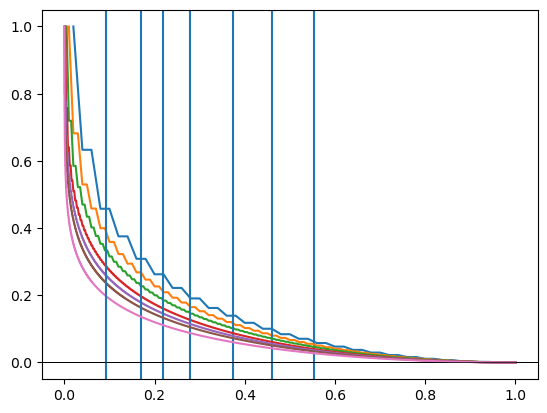

In [54]:
Ns = [50, 100, 200, 500, 1000, 2000, 10000]
alpha = 1.0

from scipy.linalg import eigh

for N in Ns:
    Jbase = interactions.powerlaw_pbc(N, alpha)
    Jbase = interactions.shift(Jbase, 0.)
    Jbase = interactions.rescale(Jbase)

    vals = eigh(Jbase, eigvals_only=True)
    plt.plot(np.arange(1, len(vals) + 1) / N, vals[::-1]) 
    plt.axvline(np.sqrt(N) * np.log(N) / N)
    plt.axhline(0, lw=0.5, c='k')
    
plt.show()

[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.707

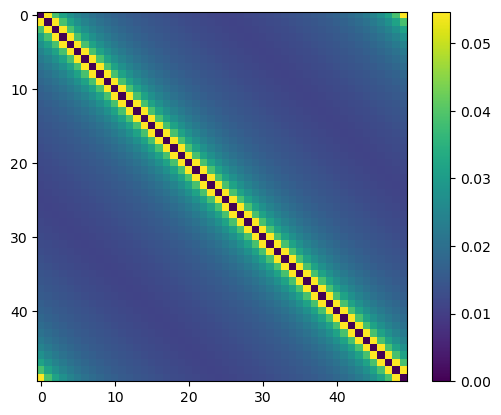

Eigvals: [-8.64813976e-20  3.45993093e-17  1.16453940e-04  5.29854067e-04
  5.29854067e-04  8.25102952e-04  8.25102952e-04  1.79179806e-03
  1.79179806e-03  2.51874527e-03  2.51874527e-03  3.97115055e-03
  3.97115055e-03  5.17509433e-03  5.17509433e-03  7.19606126e-03
  7.19606126e-03  8.95619671e-03  8.95619671e-03  1.16792232e-02
  1.16792232e-02  1.41256957e-02  1.41256957e-02  1.77671954e-02
  1.77671954e-02  2.11148223e-02  2.11148223e-02  2.60401511e-02
  2.60401511e-02  3.06593410e-02  3.06593410e-02  3.75315842e-02
  3.75315842e-02  4.41144773e-02  4.41144773e-02  5.42815383e-02
  5.42815383e-02  6.43005280e-02  6.43005280e-02  8.10490371e-02
  8.10490371e-02  9.83985650e-02  9.83985650e-02  1.32882631e-01
  1.32882631e-01  1.73479868e-01  1.73479868e-01  3.15494919e-01
  3.15494919e-01  1.00000000e+00]
[8.58708602e+03 1.88731211e+03 1.88731211e+03 1.21196997e+03
 1.21196997e+03 5.58098607e+02 5.58098607e+02 3.97023078e+02
 3.97023078e+02 2.51816190e+02 2.51816190e+02 1.9323319

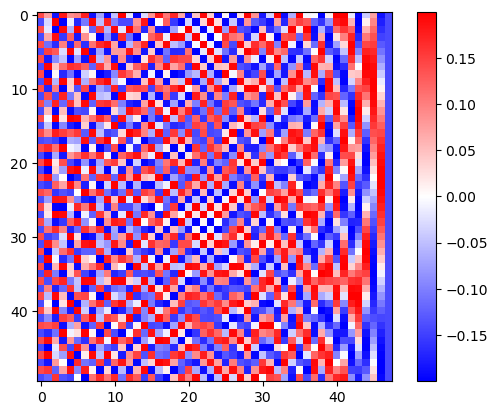



1.0000000000000002


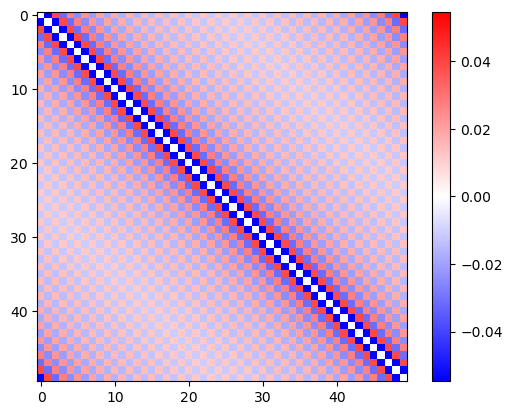

Eigvals: [-8.64813976e-20  3.45993093e-17  1.16453940e-04  5.29854067e-04
  5.29854067e-04  8.25102952e-04  8.25102952e-04  1.79179806e-03
  1.79179806e-03  2.51874527e-03  2.51874527e-03  3.97115055e-03
  3.97115055e-03  5.17509433e-03  5.17509433e-03  7.19606126e-03
  7.19606126e-03  8.95619671e-03  8.95619671e-03  1.16792232e-02
  1.16792232e-02  1.41256957e-02  1.41256957e-02  1.77671954e-02
  1.77671954e-02  2.11148223e-02  2.11148223e-02  2.60401511e-02
  2.60401511e-02  3.06593410e-02  3.06593410e-02  3.75315842e-02
  3.75315842e-02  4.41144773e-02  4.41144773e-02  5.42815383e-02
  5.42815383e-02  6.43005280e-02  6.43005280e-02  8.10490371e-02
  8.10490371e-02  9.83985650e-02  9.83985650e-02  1.32882631e-01
  1.32882631e-01  1.73479868e-01  1.73479868e-01  3.15494919e-01
  3.15494919e-01  1.00000000e+00]
[8.58708602e+03 1.88731211e+03 1.88731211e+03 1.21196997e+03
 1.21196997e+03 5.58098607e+02 5.58098607e+02 3.97023078e+02
 3.97023078e+02 2.51816190e+02 2.51816190e+02 1.9323319

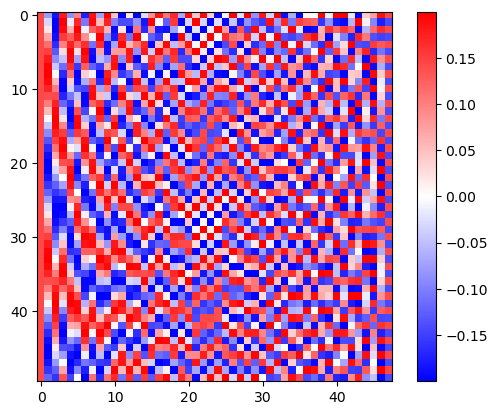

In [4]:
N = 50
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.5

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
afmJ = interactions.powerlaw_pbc_afm(N, alpha)

print(np.diag(J, k=2))
print(np.diag(afmJ, k=2))
print(np.sum(J[1:, 0]))
print(np.sum(afmJ[1:, 0]))
J = interactions.shift(J, 0.0)
ds = eigvalsh(J)
#print(f'Eigvals unrescaled: {ds}')
J, S = interactions.rescale(J, return_scale=True)

plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()


ds = eigvalsh(J)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

print()
print()

afmJ = interactions.shift(afmJ, 0.0)
afmJ = afmJ/S
print(np.sum(J[0, :]))
#afmJ = interactions.rescale(afmJ)
vmax = np.amax(np.abs(afmJ - np.diag(np.diag(afmJ))))
plt.imshow(afmJ - np.diag(np.diag(afmJ)), cmap='bwr', vmin=-vmax, vmax=vmax)
plt.colorbar()
plt.show()

from scipy.linalg import eigvalsh
ds = eigvalsh(afmJ)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(afmJ, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

print()
print()

In [5]:
alpha = 0.3
N = 100

J = interactions.powerlaw_pbc(N, alpha)
afmJ = interactions.powerlaw_pbc_afm(N, alpha)
k = N//2 * 2*np.pi/N
print(utils.Dk_exact(J[:N//2, 0], k, N))
print(utils.Dk_exact(afmJ[:N//2, 0], k, N))

-1.4399803336770316
42.059821991877264


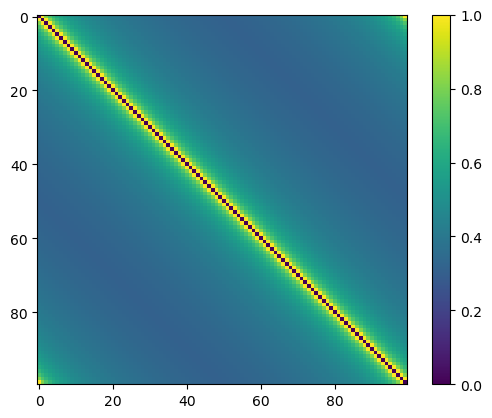

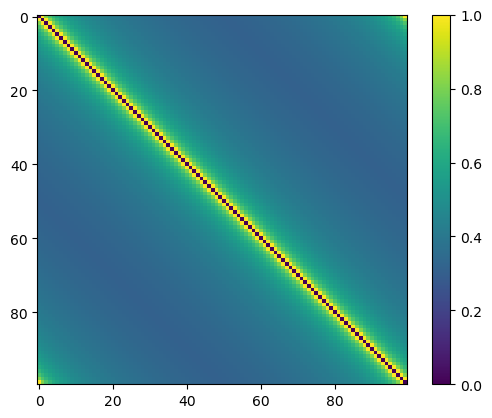

1.130730838966039
42.369071486588254


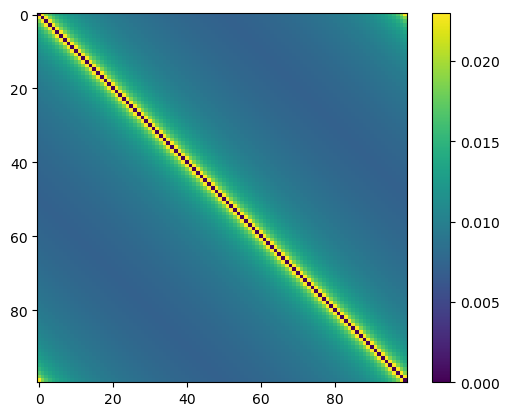

Eigvals: [1.69033665e-17 2.49058301e-05 2.49058301e-05 4.89138278e-05
 4.89138278e-05 9.91572167e-05 9.91572167e-05 9.99956898e-05
 9.99956898e-05 2.00403556e-04 2.00403556e-04 2.26402708e-04
 2.26402708e-04 3.54205090e-04 3.54205090e-04 4.06070180e-04
 4.06070180e-04 5.62975812e-04 5.62975812e-04 6.41838604e-04
 6.41838604e-04 8.30102561e-04 8.30102561e-04 9.37578053e-04
 9.37578053e-04 1.16010832e-03 1.16010832e-03 1.29837827e-03
 1.29837827e-03 1.55888366e-03 1.55888366e-03 1.73081544e-03
 1.73081544e-03 2.03401053e-03 2.03401053e-03 2.24332449e-03
 2.24332449e-03 2.59521556e-03 2.59521556e-03 2.84672099e-03
 2.84672099e-03 3.25500996e-03 3.25500996e-03 3.55494131e-03
 3.55494131e-03 4.02960633e-03 4.02960633e-03 4.38611002e-03
 4.38611002e-03 4.94025820e-03 4.94025820e-03 5.36411265e-03
 5.36411265e-03 6.01526555e-03 6.01526555e-03 6.52097497e-03
 6.52097497e-03 7.29306713e-03 7.29306713e-03 7.90057712e-03
 7.90057712e-03 8.82717918e-03 8.82717918e-03 9.56467317e-03
 9.56467317e-03

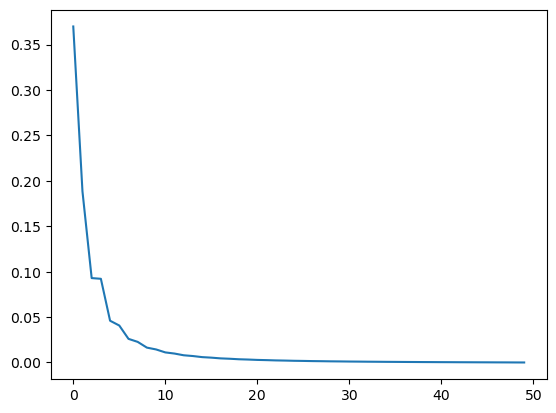

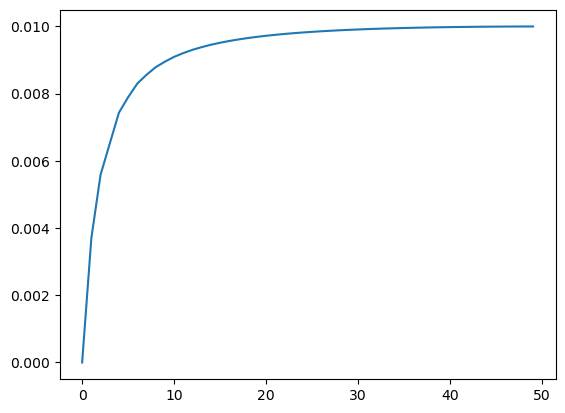

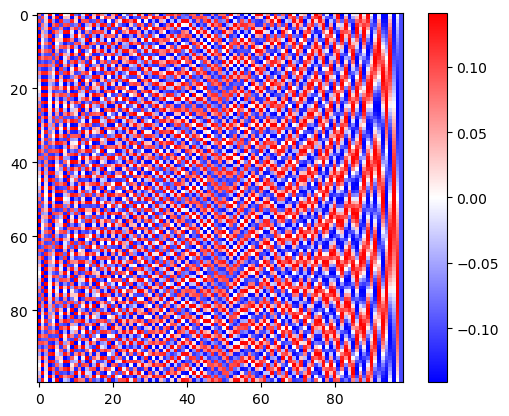

In [52]:
N = 100
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.3

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()
J, b = interactions.shift(J, 0.0, return_shift=True)
plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()
_, S = interactions.rescale(J, return_scale=True)
S = np.sum(np.abs(J[1:, 0]))
print(J[0, 0])
print(S)
J = J / (S + b)

plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()

from scipy.linalg import eigvalsh
ds = eigvalsh(J)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
eig_density = 1 / ds[1::2] - ds[:-1:2]
eig_density /= np.sum(eig_density)
plt.plot(eig_density)
plt.show()
eig_density = 1 / ds[1::2] - ds[:-1:2]
eig_density /= np.sum(eig_density)
plt.plot([np.sum(eig_density[:n]) / N for n in range(len(eig_density))])
plt.show()
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

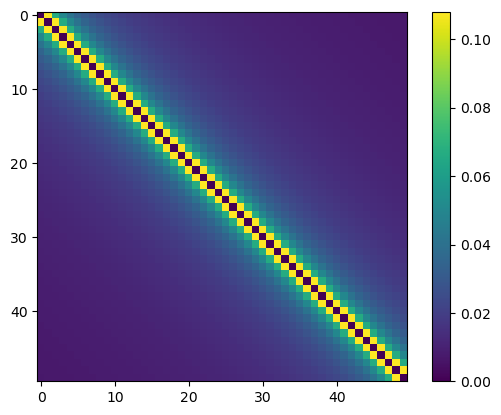

Eigvals: [1.61072005e-16 2.14081805e-04 5.71413898e-04 1.07321602e-03
 1.72033344e-03 2.51532799e-03 3.45916221e-03 4.55614021e-03
 5.80707210e-03 7.21847441e-03 8.79073115e-03 1.05331359e-02
 1.24453604e-02 1.45401674e-02 1.68162085e-02 1.92905812e-02
 2.19605777e-02 2.48487325e-02 2.79505978e-02 3.12955773e-02
 3.48770486e-02 3.87331830e-02 4.28546853e-02 4.72910656e-02
 5.20297841e-02 5.71352577e-02 6.25910583e-02 6.84815946e-02
 7.47858592e-02 8.16157321e-02 8.89449741e-02 9.69243462e-02
 1.05522006e-01 1.14945782e-01 1.25158771e-01 1.36456455e-01
 1.48800027e-01 1.62627648e-01 1.77909128e-01 1.95333353e-01
 2.14911304e-01 2.37821279e-01 2.64222054e-01 2.96405696e-01
 3.35088905e-01 3.85806244e-01 4.52000680e-01 5.54335823e-01
 7.22658479e-01 1.34605331e+00]
[4.67111158e+03 1.75004494e+03 9.31778860e+02 5.81282660e+02
 3.97562467e+02 2.89087339e+02 2.19484027e+02 1.72203820e+02
 1.38533427e+02 1.13756181e+02 9.49384884e+01 8.03512290e+01
 6.87749993e+01 5.94664368e+01 5.18387700e+0

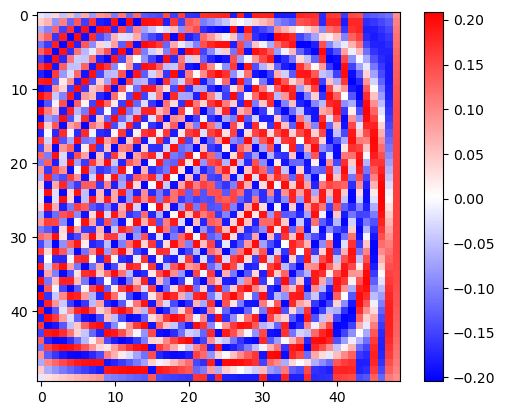

array([-2.26742752e-03, -5.37764278e-16,  4.55633201e-03,  6.93889390e-18,
        6.88892322e-03, -4.85722573e-16,  9.28892884e-03, -6.80011603e-16,
        1.17824909e-02,  1.04083409e-15, -1.43992463e-02,  9.85322934e-16,
       -1.71736891e-02,  5.13478149e-16, -2.01469522e-02, -5.27355937e-16,
       -2.33692104e-02, -3.05311332e-16, -2.69030144e-02,  4.44089210e-16,
       -3.08280364e-02, -5.27355937e-16,  3.52480120e-02, -6.38378239e-16,
        4.03011815e-02,  6.10622664e-16, -4.61764992e-02,  1.11022302e-16,
       -5.31396996e-02, -2.77555756e-16,  6.15769806e-02, -1.55431223e-15,
       -7.20718628e-02,  3.88578059e-16, -8.55486365e-02, -9.99200722e-16,
        1.03560386e-01, -4.99600361e-16, -1.28923904e-01, -1.80411242e-15,
        1.67304334e-01,  2.52575738e-15,  2.31926315e-01, -8.32667268e-17,
       -3.61929994e-01,  2.27595720e-15, -7.40551719e-01,  9.71445147e-17,
        7.01312405e+00])

In [12]:
N = 50
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.7

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_obc(N, alpha)
J = interactions.shift(J, 0.0)
J = interactions.rescale(J)
plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()


ds = eigvalsh(J)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()
np.sum(lams, axis=0)

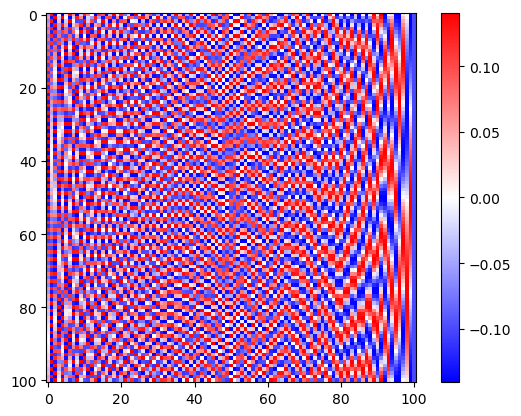

array([-9.64506253e-16,  9.99200722e-16, -8.32667268e-17, -5.45136852e-16,
        1.38777878e-16,  2.28983499e-16,  3.33066907e-16,  2.35922393e-16,
       -3.60822483e-16, -1.17961196e-16,  1.80411242e-16,  1.80411242e-16,
        4.16333634e-17, -4.16333634e-16,  1.38777878e-16,  2.63677968e-16,
       -4.16333634e-16, -2.01227923e-16,  3.60822483e-16,  1.24900090e-16,
        4.85722573e-16, -8.32667268e-17, -2.91433544e-16, -1.94289029e-16,
        8.46545056e-16,  2.22044605e-16, -2.01227923e-16, -2.22044605e-16,
        2.46330734e-16,  5.55111512e-17,  1.38777878e-17, -1.52655666e-16,
        1.80411242e-16,  0.00000000e+00, -2.22044605e-16,  7.97972799e-17,
       -2.77555756e-17,  3.46944695e-17, -1.11022302e-16,  1.37910516e-16,
       -2.22044605e-16, -5.55111512e-17, -2.77555756e-17, -1.83880688e-16,
        4.16333634e-16,  3.72965547e-17, -2.49800181e-16,  2.22044605e-16,
        5.27355937e-16,  8.32667268e-17,  3.33066907e-16,  6.27753058e-16,
       -1.66533454e-16,  

In [12]:
N = 100
M = int(np.sqrt(N) * np.log(N))
alpha = 0.3

J = interactions.powerlaw_pbc(N, alpha)

vals, vects = eigh(J)
plt.imshow(vects, cmap='bwr')
plt.colorbar()
plt.show()
np.sum(vects, axis=0)

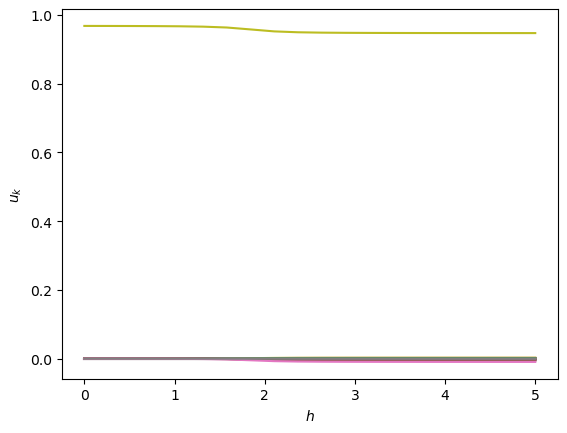

In [19]:
N = 100
M = int(np.sqrt(N) * np.log(N))
beta = 10
wz = 1
J0 = 1
alpha = 0.5

gs = 0.00 * np.ones(N)


g0s = np.linspace(0, 5, 20)

J = interactions.powerlaw_pbc(N, alpha)
J = interactions.shift(J, 0.0)
J = J0 * interactions.rescale(J)
ws, lams = utils.dicke_from_ising(J, 1e-6)

ukss = []
for g0 in g0s:
    gs[0] = g0
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags, uks = dicke.mag_longitudinal_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)
    ukss.append(uks)

plt.plot(g0s, ukss)
#plt.axvline(0.25, c='k', lw=0.5)
#plt.axhline(1.00, c='k', lw=0.5)
plt.xlabel(r'$h$')
plt.ylabel(r'$u_k$')
plt.show()

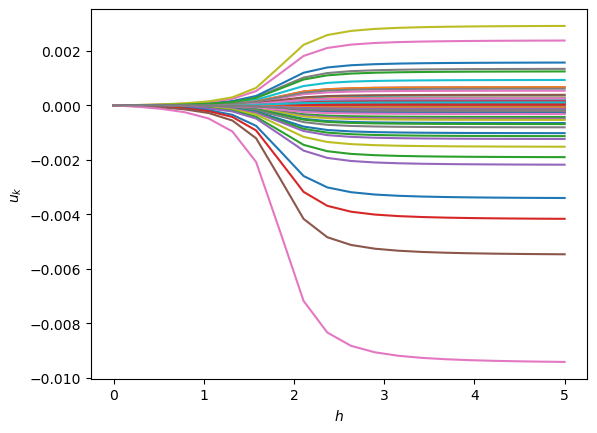

In [14]:
ukss = []
for g0 in g0s:
    gs[0] = g0
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags, uks = dicke.mag_longitudinal_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)
    ukss.append(uks[:-1])

plt.plot(g0s, ukss)
#plt.axvline(0.25, c='k', lw=0.5)
#plt.axhline(1.00, c='k', lw=0.5)
plt.xlabel(r'$h$')
plt.ylabel(r'$u_k$')
plt.show()

[[ 1.31415921  0.5224802   0.71390042 -1.22079736  1.3887646   0.26708218
   1.38990078  0.26110499 -1.39195003  0.2499502   1.41318659  0.0538856
  -1.41319351  0.0537038   0.04310128  1.41355661  1.41303542 -0.05771406
  -1.        ]
 [-1.08838442 -0.90300573  0.14000911  1.40726595 -0.60022133 -1.28052113
  -0.18117736 -1.40256007 -0.2499502  -1.39195003  0.38545042  1.36067188
  -0.87410159 -1.11173126 -0.79599806  1.16892561  1.36171116  0.38176263
  -1.        ]
 [ 0.75607098  1.19513877 -0.94043992 -1.05620678 -0.68316211  1.23826069
  -1.27792701  0.60572481  1.39195003 -0.2499502  -1.17496513  0.78705587
   0.38562546 -1.36062229 -1.33105319  0.47780477  1.17709314  0.78386973
  -1.        ]
 [-0.34974804 -1.3702833   1.38165464  0.30171252  1.40332655 -0.17514162
   0.97097969  1.02820155  0.2499502   1.39195003 -1.11161881 -0.8742446
   1.32743151 -0.48777616 -1.35769125 -0.39582126  0.87725303  1.10924619
  -1.        ]
 [-0.09081067  1.41129494 -1.29512426  0.56802567 -0.9

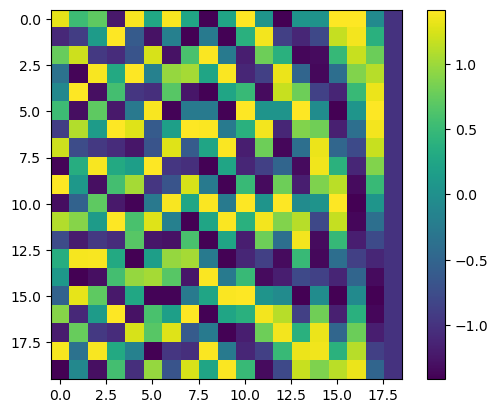

[[-1.41372081e+00 -3.73292914e-02  1.40705790e+00  1.42084665e-01
  -1.39736645e+00  2.17639600e-01  1.37262962e+00 -3.40423175e-01
  -1.39607360e+00  2.25784206e-01  7.89526927e-02  1.41200796e+00
  -1.41421334e+00  7.88351163e-04  4.98928536e-02  1.41333319e+00
  -5.80249973e-02  1.41302268e+00 -1.00000000e+00]
 [ 1.28991501e+00 -5.79757941e-01 -9.34804315e-01 -1.06119786e+00
   5.10201804e-01 -1.31897465e+00 -6.37326879e-01 -1.26246364e+00
  -3.29481579e-01 -1.37529702e+00  1.34324580e+00  4.42369445e-01
  -8.81131239e-01  1.10616804e+00 -7.54935524e-01  1.19585633e+00
  -4.71942857e-01  1.33314288e+00 -1.00000000e+00]
 [-9.10625722e-01  1.08201700e+00 -3.65377987e-02  1.41374149e+00
   8.87164649e-01  1.10133505e+00 -1.08899247e+00  9.02272352e-01
   1.34682922e+00 -4.31336356e-01  9.02532899e-01 -1.08877655e+00
   3.15460659e-01  1.37858064e+00 -1.29740686e+00  5.62792543e-01
  -8.43926522e-01  1.13480748e+00 -1.00000000e+00]
 [ 3.50975843e-01 -1.36996933e+00  9.88372519e-01 -1.01

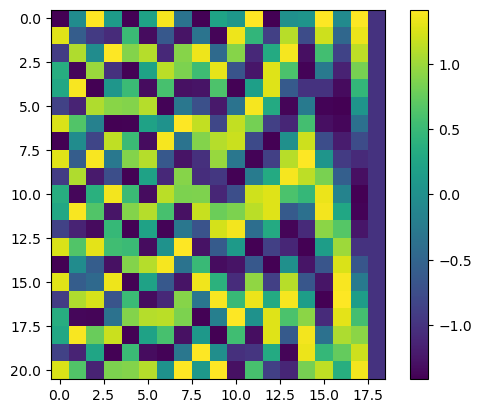

[[-1.          0.4648223  -1.33564225  1.41152952  0.08708856 -0.59538104
  -1.28277879 -0.42621993  1.34845711 -1.41343262  0.04699169  0.1518965
   1.40603252 -1.40613322  0.15096144 -0.28340371  1.38552602  0.01039688
  -1.41417534 -1.        ]
 [ 1.          0.33106931  1.37491567 -0.85853812 -1.12379371 -0.91952641
   1.07446321  1.39538918  0.22997617 -0.15463905  1.40573353  1.34207225
   0.4459171  -1.03491048 -0.96382587 -0.98748629  1.01235904  0.40839497
  -1.35396217 -1.        ]
 [-1.         -1.02184876 -0.97766308 -0.28708372  1.38476819  1.35935119
   0.39008249  0.02905076 -1.41391515  1.36941776  0.35312179  0.96313743
  -1.0355512   0.05068876 -1.41330487 -1.37804895  0.31777523  0.77330733
  -1.18405903 -1.        ]
 [ 1.          1.38819845  0.27000937  1.23453782 -0.68986692 -0.20986338
  -1.39855546 -1.40365789  0.17246604  0.54441599 -1.30522459 -0.54186876
  -1.30628414  1.10129863 -0.88720986 -1.33109081 -0.47769998  1.07557092
  -0.91823047 -1.        ]
 [-1.

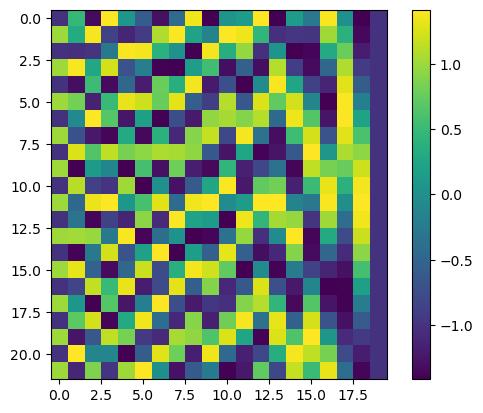

[[ 0.12549263  1.40863466 -0.44853836 -1.34119847  1.33082872  0.47842964
  -1.28198075  0.59709745  1.39441248  0.23582586 -1.41157183  0.08640005
  -0.60178254  1.27978818 -1.41380591 -0.03395373 -0.18778092  1.40169124
  -1.39568405  0.22817983 -1.        ]
 [-0.67630484 -1.24201923 -0.49847792  1.32344995 -0.37660012 -1.36314796
  -0.13331238 -1.40791612  0.14011802 -1.40725511 -0.20259987  1.39962613
   0.8594459   1.12309962 -0.98981227  1.01008498 -0.88873993  1.10006424
  -1.40549048 -0.15683275 -1.        ]
 [ 1.11513626  0.86975348  1.22188826 -0.71203166 -0.89647296  1.09377156
   1.37126794  0.34586736 -1.41353646 -0.04375689  1.32913151  0.48312466
   1.39258456 -0.24639044  0.06260695  1.41282708 -1.33093237  0.47814123
  -1.31105811 -0.53021376 -1.        ]
 [-1.36932632 -0.35347622 -1.39718711 -0.21878795  1.41055675  0.10163488
  -0.78510697  1.17626827  0.05280826  1.41322726  0.74343946 -1.20303689
   0.42191303 -1.34981087  1.07527742  0.91857416 -1.38560895 -0.2829

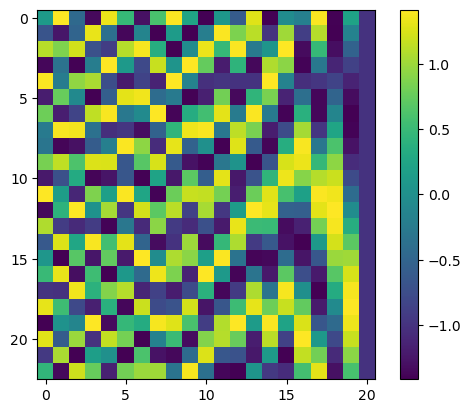

[[ 0.0885489   1.41143866  0.89157989 -1.09776377  0.35108725 -1.36994078
   1.05550333 -0.94122937  0.63404761 -1.26411377  1.41403052 -0.02275301
  -1.41412101  0.01617947  1.40672536  0.14534019  0.11531464 -1.40950436
   1.40468975 -0.16384968  0.05540691 -1.41312776 -1.        ]
 [-0.45083887 -1.34042691 -0.22324895  1.39648126  0.72043825  1.21695059
  -1.34288021 -0.44347801  1.05693655  0.93961968 -0.02275301 -1.41403052
  -0.35037328  1.37012356  0.57749438  1.29092999 -0.91513032 -1.07820985
   1.13457217 -0.84424285 -0.31222541 -1.37931697 -1.        ]
 [ 0.78240492  1.17806729 -0.50490137 -1.32101272 -1.36994078 -0.35108725
   0.28737688  1.38470738 -1.18115822  0.77773084 -1.41403052  0.02275301
   1.23275445  0.69304867 -0.82923097  1.1455898  -1.40950436 -0.11531464
   0.56044689 -1.29842184 -0.65858009 -1.251508   -1.        ]
 [-1.06065137 -0.93542432  1.09776377  0.89157989  1.21695059 -0.72043825
   1.05550333 -0.94122937 -0.44552406 -1.34220278  0.02275301  1.414030

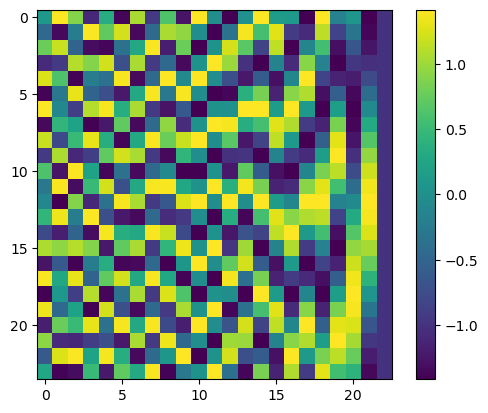

[[-1.20353104  0.74263924  1.19105401 -0.76248957 -1.2111733   0.73010907
  -0.50235766  1.32198214 -1.23038025 -0.69725494  1.32119703  0.50441887
   1.38185213 -0.30080674 -1.40159835  0.18847297  0.08203456 -1.41183226
   1.41316301  0.05450052 -1.41213033 -0.07673277 -1.        ]
 [ 1.3923986  -0.24743918 -1.41176306 -0.08321697  1.33458962  0.46783603
   1.41005869 -0.10832582 -0.45435437  1.33923938  0.58638217 -1.28691723
   0.14093158 -1.40717387 -0.59188096  1.28439749  1.02626631 -0.97302491
   1.26462001 -0.63303731 -1.348683   -0.42550461 -1.        ]
 [-1.38570791 -0.28251298  1.0932266   0.89713745 -0.49022558 -1.32652888
  -0.69838993 -1.22973636  1.40065528  0.19535807 -1.24755855 -0.66603128
  -1.29475162 -0.56887454  0.76730699  1.18795622  1.41419732 -0.006777
   0.80322691 -1.16397016 -1.20049295 -0.74754042 -1.        ]
 [ 1.18439867  0.77278703 -0.35711474 -1.36838191 -0.70962652  1.22328664
  -0.81533876  1.15551837 -0.07055889 -1.41245228 -0.74305187  1.20327633

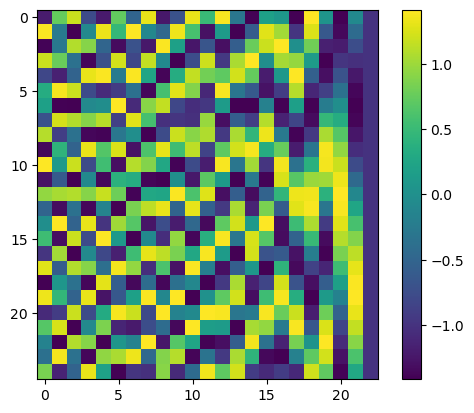

[[ 1.         -1.40447317  0.16569584  0.68255485  1.23859553 -0.16786145
  -1.40421599 -0.0588779   1.4129874  -1.41392414  0.0286099   1.41356609
  -0.04278909 -0.74002323  1.20514133 -1.41308601  0.05646179 -1.41403082
  -0.02273394 -0.00629461  1.41419955  0.09119844 -1.41126994 -1.        ]
 [-1.          1.32060193  0.50597485  0.31044112 -1.37971965 -1.06029093
   0.93583286 -1.30028778 -0.55610403  0.14202843 -1.40706358  0.12790946
  -1.40841726 -1.38924257 -0.26458474 -0.7562572   1.19502094 -1.07349266
   0.92065928 -0.6627849   1.24928627  0.42628738 -1.34843579 -1.        ]
 [ 1.         -0.9341967  -1.0617328  -1.14729187  0.82687445  1.37248924
   0.34098867  0.9810547  -1.01859299  1.37968487  0.31059565 -1.38273053
  -0.29674279 -0.24524118 -1.39278741  0.5538799   1.30123674 -0.19301077
   1.40098067 -1.16743916  0.79817655  0.73660205 -1.20723544 -1.        ]
 [-1.          0.33377826  1.37426056  1.40707948  0.14187082 -0.49903458
  -1.32324015  0.6045142   1.278500

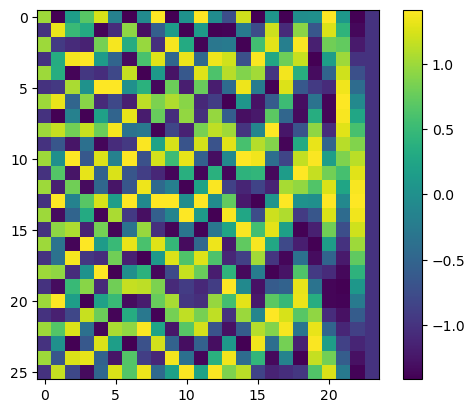

[[-1.41412617 -0.01572165  1.34117519  0.44860796  1.39104557  0.25493571
  -1.35058893  0.41941573 -0.19344992  1.4009201  -0.09303027 -1.41115037
   1.40951737 -0.11515547 -0.79221993  1.17148947 -1.39723153 -0.21850412
   1.41138475 -0.089404   -0.19037877  1.40134076  0.09703545 -1.41088062
  -1.        ]
 [ 1.33422105 -0.46888612 -1.36704963  0.36218133 -1.1400269   0.83686239
   1.03851914  0.95993646  1.39754883 -0.21646542  1.41417216 -0.01082178
   0.13135412 -1.40810017 -1.38946279 -0.26342583 -1.00963604  0.9902702
   1.13865123  0.8387332  -0.79904926  1.16684201 -0.23095161 -1.39522806
  -1.        ]
 [-1.09338918  0.8969393   0.94313141 -1.05380413  0.17362229 -1.40351534
   0.31206979 -1.37935218 -0.60819312 -1.27675414 -0.07142332  1.41240883
  -1.36389856 -0.37387259 -0.30845626 -1.38016475  0.19140586  1.40120084
   0.33313014  1.37441781 -1.23773424  0.68411545 -0.54648802 -1.3043584
  -1.        ]
 [ 0.72067844 -1.21680836 -0.20889997  1.39869968  0.90173322  1.0894

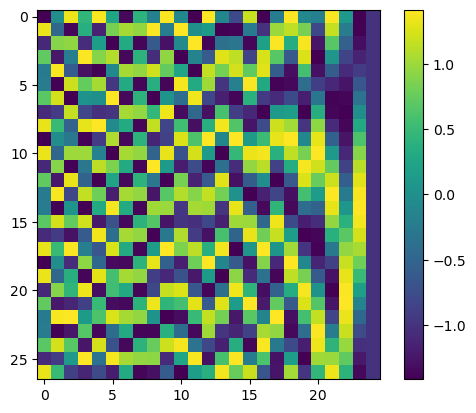

[[ 0.25010838  1.39192162 -0.04296947 -1.41356062  0.59450514 -1.28318496
  -0.94008362  1.05652391 -1.17961379 -0.78007135 -1.35199131  0.41487287
  -0.52203367  1.31433666 -1.40756254  0.13699529  1.41317781  0.05411549
  -1.40957723 -0.11442037  1.41097717 -0.09562125 -0.03772922  1.41371019
  -1.41379058 -0.03458592 -1.        ]
 [ 0.06589406 -1.41267759  0.65203512  1.25493036  0.3352499   1.37390229
  -0.23989111 -1.39371886  1.21463524 -0.72433502 -0.10362477 -1.41041196
  -1.31433666 -0.52203367 -0.1796516   1.40275632  0.66191124 -1.24974938
  -0.96831448  1.03071193  1.16276525  0.80497018 -0.64737872  1.25733878
  -1.38603999  0.28087922 -1.        ]
 [-0.3785923   1.362596   -1.13195722 -0.84774574 -1.118723   -0.86513517
   1.23922294  0.68141508  0.12559282  1.40862573  1.39810867  0.2128195
   0.52203367 -1.31433666  1.32761005  0.48729001 -0.83879276 -1.13860736
   0.20210883  1.39969712  0.40719578  1.3543233  -1.12880692  0.85193599
  -1.28878757  0.58225991 -1.      

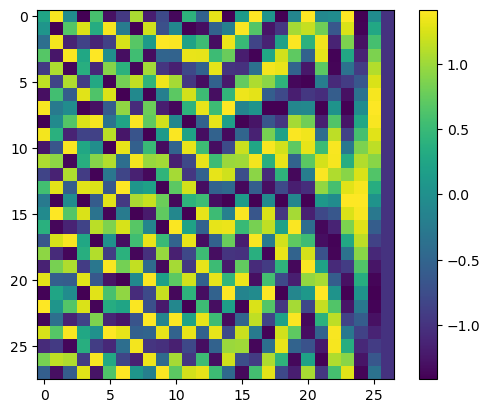

[[ 1.36066314  0.38548127  0.19009502 -1.40137928 -0.4273334  -1.34810466
  -0.34663344  1.37107449 -0.23775736 -1.39408444  1.39772755 -0.21530836
   1.38555819 -0.28324638 -1.39653891  0.22288804  1.41265737  0.06632603
  -1.41082746 -0.09780533  1.38484524  0.2867118   1.41408668  0.01894354
   0.02875378 -1.41392122 -1.        ]
 [-1.4125215   0.06915927 -0.88537077  1.10277767 -0.61684872  1.27259485
  -0.94029707 -1.05633396  1.38307506  0.29513279 -0.01365515  1.41414764
  -0.20781837 -1.3988608  -0.5883775  -1.28600619  0.72030049 -1.21703213
  -0.98789385  1.01196133  0.92895511  1.06632191  1.2913445  -0.57656689
   0.3320328  -1.37468332 -1.        ]
 [ 1.31649782 -0.51655928  1.32717758 -0.48846665  1.32299218 -0.49969159
   1.40199855 -0.18547259 -0.78610035  1.17560463 -1.39330924 -0.24225889
  -1.40806031  0.13178079  1.0817236  -0.91097424 -0.73786772 -1.20646228
   0.13172959  1.4080651   0.0942242   1.41107115  0.92989837 -1.06549942
   0.61978634 -1.27116675 -1.     

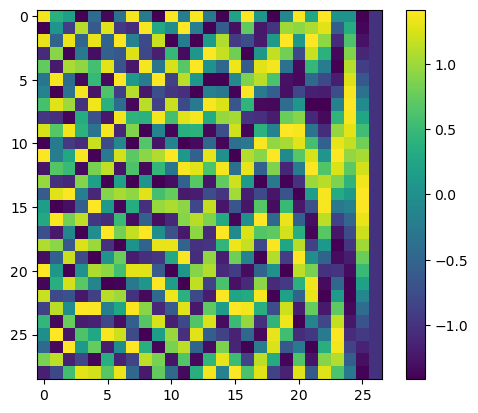

[[-1.          1.33843751  0.4567111   0.60690032  1.27736917 -0.61813312
  -1.27197148  1.25157035  0.65846159  0.60515165 -1.27819853  1.07026569
   0.92440865  0.52532119  1.31302614 -1.39462832 -0.23454603  1.41377388
   0.03526194 -1.41407657 -0.0196842   1.41308977  0.05636757  1.41420686
   0.00435518  0.04659169 -1.41344587 -1.        ]
 [ 1.         -1.03696237 -0.96161793  0.25982609 -1.39014043  1.35887081
   0.39175262 -1.19602964  0.75466092 -1.40264118 -0.18054836 -1.03121787
   0.96777565  1.36074426 -0.38519482 -0.20789733 -1.39884906  0.73742468
  -1.20673313 -0.96083012  1.03769238  1.11008161  0.87619565  1.29371366
  -0.5712311   0.33944547 -1.37287173 -1.        ]
 [-1.          0.55618701  1.30025229 -1.02730776  0.97192528 -1.20039098
   0.74770414 -0.05554071 -1.41312251  0.26172827  1.38978355 -0.85468246
  -1.12672885 -0.24084818 -1.39355379  1.26614071 -0.62999024 -0.67634921
  -1.24199507  0.12823489  1.40838766  0.38306001  1.36134677  0.94952562
  -1.04804

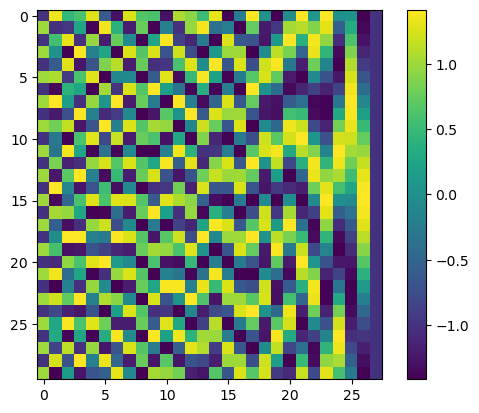

[[ 0.06519858  1.41270986 -0.57103037 -1.29380227 -0.46461018  1.33571606
   0.30314978 -1.38134001 -1.33418757  0.46898138 -0.18637696  1.40187861
  -1.12978028  0.85064477  0.68830745  1.23540797  0.19316002 -1.4009601
   1.4132315   0.05269466 -1.41420701 -0.00430427  1.41400328 -0.02438725
   1.41416983 -0.01112155 -1.41341713  0.04745537 -1.        ]
 [ 0.36070471 -1.36743999  1.12716325  0.85410948 -0.51752194 -1.31611969
   0.90677037  1.08524997  1.00862201  0.991303    1.40384246 -0.17095715
  -0.79233054 -1.17141467  1.32539051 -0.49329503 -1.24666783 -0.66769702
   0.79226762 -1.17145722 -0.97746155  1.02204154  1.17449386  0.78775896
   1.29517656 -0.56790639 -1.3749317   0.33100273 -1.        ]
 [-0.75352363  1.19674648 -1.40003238 -0.1997732   1.24995813  0.66151696
  -1.41322891  0.052764    0.4458051  -1.34210947 -0.51737638 -1.31617692
   1.21004205 -0.73198241 -0.28690557 -1.38480511 -1.05910859  0.93717074
  -0.57506938 -1.29201208  0.06732966  1.4126099   0.51395996

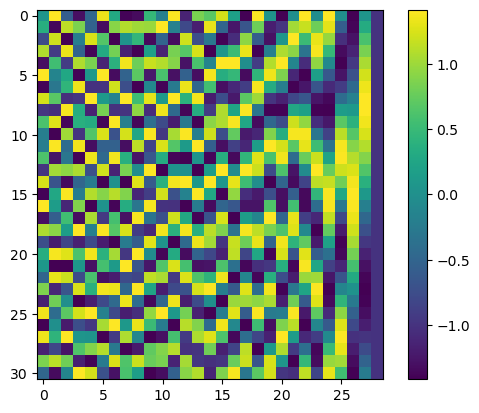

[[-1.05773197e+00 -9.38724180e-01  1.40872963e+00  1.24421944e-01
  -1.23596792e+00  6.87301461e-01  1.09672325e+00  8.92859517e-01
  -1.41167501e+00 -8.46975760e-02  1.30687329e+00  5.40446310e-01
   9.25376398e-01 -1.06942906e+00 -1.30227938e+00 -5.51423987e-01
  -9.61825775e-01  1.03676959e+00  9.93854765e-02 -1.41071703e+00
   1.41398166e+00  2.56097017e-02 -1.41420096e+00 -5.96997702e-03
   1.41396859e+00 -2.63214626e-02  1.03924328e-02  1.41417538e+00
  -1.41390669e+00 -2.94596471e-02 -1.00000000e+00]
 [ 1.22054395e+00  7.14333588e-01 -1.25388226e+00 -6.54048379e-01
   1.40951400e+00  1.15196707e-01 -1.40684746e+00  1.44153427e-01
   8.54708072e-01 -1.12670942e+00 -8.11470103e-04 -1.41421333e+00
   8.68348305e-01  1.11623081e+00  5.51423987e-01 -1.30227938e+00
   8.29205451e-01  1.14560828e+00  1.34136576e+00 -4.48037826e-01
   8.06859811e-01 -1.16145480e+00 -1.00421250e+00  9.95769679e-01
   1.19029534e+00  7.63673364e-01 -5.31580131e-01  1.31050470e+00
  -1.39248616e+00  2.4694

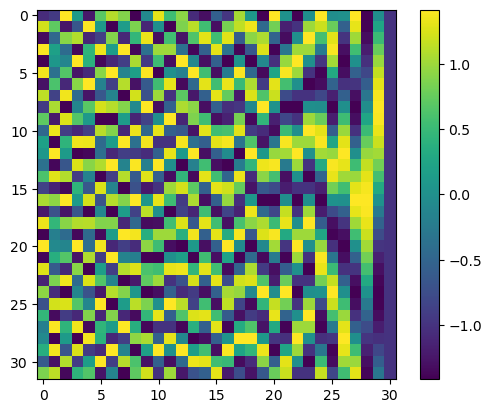

[[ 1.40936618  0.11699132 -1.19243766 ... -1.414171   -0.01097248
  -1.        ]
 [-1.31931668 -0.50931669  0.71148028 ... -1.39069164  0.25685943
  -1.        ]
 [ 1.122384    0.86038024 -0.07234014 ... -1.31694906  0.51540777
  -1.        ]
 ...
 [-1.01135471  0.98851487  0.92228647 ... -1.18374418 -0.7737892
  -1.        ]
 [ 1.24888456 -0.66354152 -1.31102327 ... -1.30879295 -0.53578076
  -1.        ]
 [-1.38523721  0.28481199  1.40828144 ... -1.38653853 -0.27840781
  -1.        ]]
[-1.14386615e-16 -1.17750927e-17  1.21115239e-16 -4.20539024e-18
 -3.36431220e-17 -6.72862439e-17 -1.41301112e-16  1.00929366e-17
 -5.38289951e-17  1.44665424e-16  2.35501854e-17 -1.48029737e-16
 -8.66310390e-17 -6.72862439e-18 -6.05576195e-17  4.37360585e-17
 -5.38289951e-17 -5.38289951e-17  4.03717464e-17  1.03032061e-17
  6.72862439e-18 -2.01858732e-17 -5.38289951e-17  2.01858732e-17
  3.36431220e-17  1.95130107e-16  2.55687727e-16  1.34572488e-17
 -6.52676566e-16 -1.85037171e-17 -1.00000000e+00]


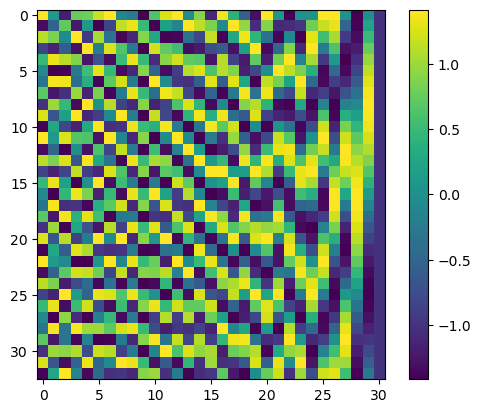

[[ 1.         -0.98462608  1.01514111 ... -1.41343978 -0.04677595
  -1.        ]
 [-1.          1.28484774 -0.59090293 ... -1.38077822 -0.30569838
  -1.        ]
 [ 1.         -1.4115436   0.08686003 ... -1.30109592 -0.55421061
  -1.        ]
 ...
 [-1.         -0.46983145 -1.33388845 ... -1.22635508  0.70431045
  -1.        ]
 [ 1.         -0.04375131  1.41353664 ... -1.33489076  0.46697607
  -1.        ]
 [-1.          0.55142521 -1.30227886 ... -1.39796834  0.21373938
  -1.        ]]
[ 1.69798816e-16 -3.26536184e-17  7.83686841e-17 -8.16340459e-17
  1.37145197e-16  1.56737368e-16 -2.93882565e-17 -1.30614473e-17
  1.50206645e-16 -4.57150657e-17 -6.93889390e-17  9.14301314e-17
 -6.53072367e-18  2.61228947e-17  6.53072367e-18 -6.44908963e-17
  0.00000000e+00 -2.20411924e-17  7.18379604e-17 -1.95921710e-17
  5.83683428e-17 -1.89390987e-16  3.26536184e-17  1.95921710e-16
  1.95921710e-17 -4.73477466e-17 -2.80821118e-16  6.85725986e-17
 -5.48580789e-16  1.20165316e-15  6.85725986e-17 -1.0

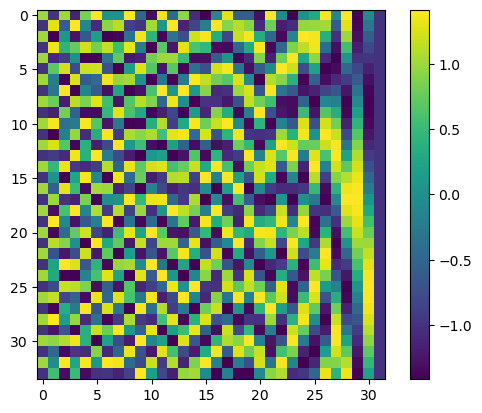

[[-3.75862240e-01  1.36335160e+00  3.79776082e-01 ... -7.16661070e-01
  -1.21917879e+00 -1.00000000e+00]
 [ 7.25018999e-01 -1.21422710e+00 -9.33231727e-01 ... -4.87451254e-01
  -1.32755086e+00 -1.00000000e+00]
 [-1.02192054e+00  9.77588062e-01  1.30184938e+00 ... -2.42574353e-01
  -1.39325435e+00 -1.00000000e+00]
 ...
 [-7.25679176e-01 -1.21383266e+00  1.24360355e+00 ... -1.24053275e+00
  -6.79027612e-01 -1.00000000e+00]
 [ 3.76603562e-01  1.36314700e+00 -8.28276355e-01 ... -1.09935182e+00
  -8.89621035e-01 -1.00000000e+00]
 [-3.84517683e-04 -1.41421351e+00  2.48898874e-01 ... -9.22836810e-01
  -1.07162131e+00 -1.00000000e+00]]
[ 3.14774868e-17 -5.70971841e-17  1.98254112e-17 -3.80647894e-17
  2.53765263e-17  9.51619735e-18 -2.53765263e-17 -1.26882631e-17
  6.34413157e-17 -4.24263799e-17  0.00000000e+00 -1.58603289e-17
 -1.90323947e-17  9.43565662e-18  3.80647894e-17 -7.61295788e-17
  2.53765263e-17  5.39251183e-17  5.07530526e-17 -6.34413157e-18
  6.34413157e-18  3.17206578e-17 -6.344

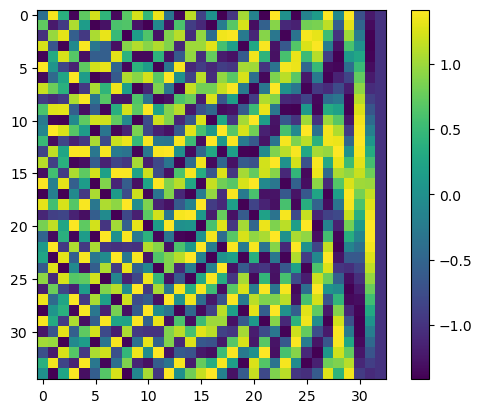

[[-1.21304737  0.72699112  1.40716433 ... -1.41174991  0.08343978
  -1.        ]
 [ 1.06837777 -0.92658995 -1.27406793 ... -1.37581309  0.32731995
  -1.        ]
 [-0.89124605  1.09803482  0.98730013 ... -1.29807288  0.56125466
  -1.        ]
 ...
 [ 1.41402539 -0.02306909 -0.82571496 ... -1.26433118 -0.63361398
  -1.        ]
 [-1.38853727  0.26826156  1.16860069 ... -1.35514906 -0.40443916
  -1.        ]
 [ 1.32085913 -0.50530303 -1.37053594 ... -1.40479142 -0.16297565
  -1.        ]]
[ 2.46716228e-17 -6.16790569e-18 -1.60365548e-16  3.70074342e-17
 -1.23358114e-16 -7.90262917e-18 -6.78469626e-17  4.31753398e-17
  1.41861831e-16 -9.25185854e-18 -4.70302809e-17  1.23358114e-17
 -6.16790569e-17  3.70074342e-17  1.17190208e-16  4.93432455e-17
 -2.00456935e-17 -2.46716228e-17  6.55339980e-17 -3.70074342e-17
  4.31753398e-17 -8.94346325e-17 -2.46716228e-17  2.46716228e-17
 -5.55111512e-17 -5.55111512e-17  2.46716228e-17 -3.70074342e-17
  3.08395285e-17  1.29526020e-16  3.70074342e-17  1.2

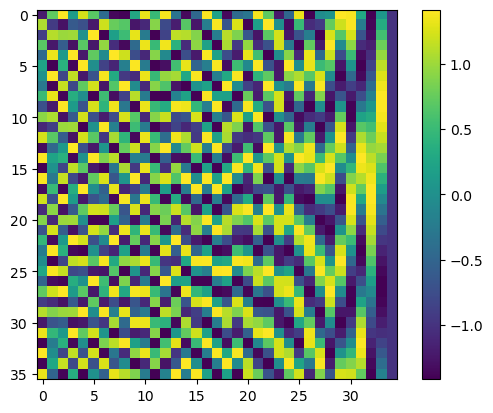

[[-0.49899861 -1.32325371 -0.08572102 ... -1.41018591 -0.10665689
  -1.        ]
 [ 0.14946649  1.40629292 -0.50333381 ... -1.37187657 -0.3434453
  -1.        ]
 [ 0.20971131 -1.39857827  1.00302524 ... -1.29410084 -0.57035342
  -1.        ]
 ...
 [ 1.27586576  0.61005455  1.37483868 ... -1.28312823  0.59462757
  -1.        ]
 [-1.08097697 -0.91186007 -1.11629267 ... -1.36516414  0.36922467
  -1.        ]
 [ 0.8163283   1.15481951  0.65955669 ... -1.40792677  0.13319985
  -1.        ]]
[-9.00180831e-18  3.00060277e-17 -1.80036166e-17 -5.40108498e-17
  3.30066305e-17  5.40108498e-17 -3.86327607e-17  6.00120554e-18
  4.20084388e-17 -9.30186858e-17  7.50150692e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.20084388e-17  1.65033152e-17
  1.20024111e-17 -2.70054249e-17  2.40048222e-17  6.00120554e-17
 -2.40048222e-17 -4.20084388e-17 -4.50090415e-17  6.00120554e-18
 -2.70054249e-17 -1.20024111e-17  3.60072332e-17  9.00180831e-17
 -3.60072332e-17 -4.80096443e-17 -6.60132609e-17 -1.05

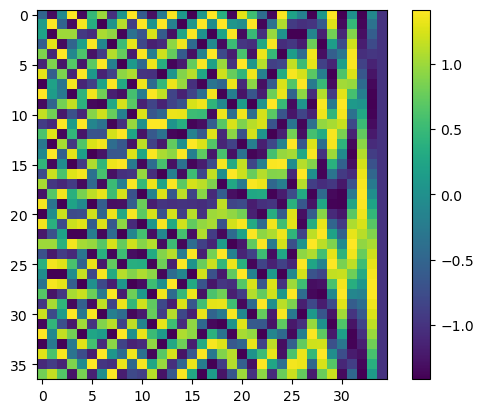

[[-1.          1.32248018  0.50104508 ... -1.36312949 -0.37666695
  -1.        ]
 [ 1.         -1.41351363 -0.04448846 ... -1.40653552 -0.14716596
  -1.        ]
 [-1.          1.35137094 -0.41688917 ... -1.41157493  0.08634933
  -1.        ]
 ...
 [ 1.         -0.30386995 -1.38118176 ... -1.01956295 -0.98004662
  -1.        ]
 [-1.          0.73587443  1.20767911 ... -1.16696782 -0.79886552
  -1.        ]
 [ 1.         -1.08813549 -0.90330569 ... -1.28254084 -0.59589344
  -1.        ]]
[-1.11022302e-16  9.93357443e-17 -3.21380349e-17  1.16865582e-17
 -6.13544303e-17  2.92163954e-17  1.00796564e-16 -1.16865582e-17
 -8.47275466e-17 -4.67462326e-17  2.48339361e-17 -3.79813140e-17
 -5.84327908e-18  8.76491862e-18 -5.25895117e-17 -4.09029535e-17
  5.55111512e-17 -2.99468053e-17 -3.50596745e-17  2.92163954e-17
 -5.55111512e-17  4.67462326e-17 -3.50596745e-17 -2.04514768e-17
 -6.42760698e-17  5.84327908e-17 -1.02257384e-16  1.63611814e-16
 -8.76491862e-18 -1.75298372e-16 -2.92163954e-18 -1.7

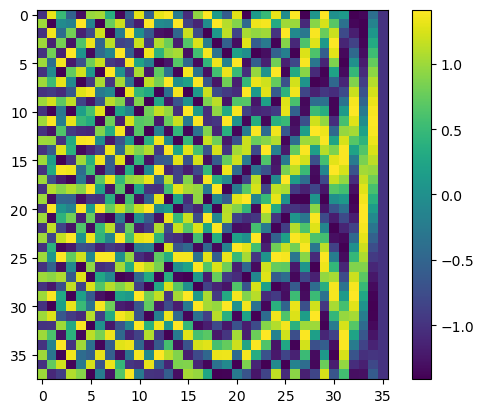

[[-1.38317818  0.29464916 -0.57563724 ... -0.03522892 -1.41377471
  -1.        ]
 [ 1.27247138 -0.61710339  0.02324796 ...  0.1920127  -1.40111781
  -1.        ]
 [-1.08781316  0.90369382  0.53286194 ...  0.41428128 -1.3521727
  -1.        ]
 ...
 [ 1.23071227  0.69666873  1.41193959 ... -0.68820753 -1.23546364
  -1.        ]
 [-1.36167374 -0.38189608 -1.33037781 ... -0.48111312 -1.32986096
  -1.        ]
 [ 1.41349969  0.04492902  1.03590089 ... -0.26155813 -1.38981558
  -1.        ]]
[ 9.10952225e-17  9.07393818e-18  2.84672570e-17 -5.12410627e-17
 -8.00641604e-17  3.41607085e-17 -2.84672570e-18 -1.70803542e-17
  3.98541599e-17  2.63322128e-17 -1.70803542e-17  1.85926773e-17
  4.12775227e-17 -5.69345141e-18  5.69345141e-17 -5.69345141e-18
 -3.06912615e-17  1.70803542e-17 -3.55840713e-19  5.69345141e-18
  3.98541599e-17 -5.69345141e-18  8.25550454e-17 -1.70803542e-17
  5.69345141e-18 -6.97447798e-17 -2.84672570e-17  5.69345141e-18
  1.13869028e-16  2.84672570e-18 -4.55476113e-17 -9.10

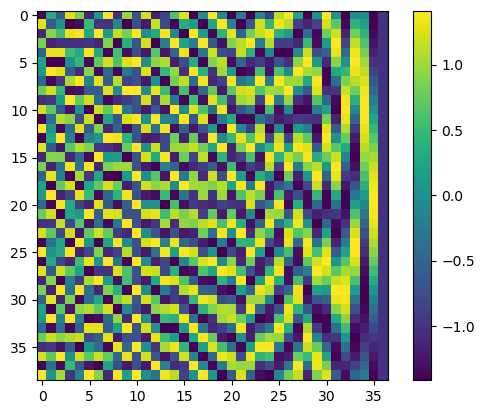

[[ 1.01695587  0.98275162 -1.34097696 ... -1.41124609  0.09156678
  -1.        ]
 [-1.15817168 -0.81156537  1.1365344  ... -1.37954711  0.31120697
  -1.        ]
 [ 1.27086946  0.62039569 -0.82083993 ... -1.3138791   0.52318421
  -1.        ]
 ...
 [-0.45995442 -1.33732641  1.15161704 ... -1.29899992 -0.55910572
  -1.        ]
 [ 0.66349556  1.24890898 -1.34890638 ... -1.37047048 -0.34901384
  -1.        ]
 [-0.85069923 -1.12973927  1.41415536 ... -1.40819551 -0.13032808
  -1.        ]]
[-1.30104261e-17  6.10622664e-17 -2.59774841e-17  2.33320308e-17
  3.33066907e-17 -2.60208521e-17  3.05311332e-17 -4.37150316e-17
 -8.88178420e-17 -4.44089210e-17 -8.32667268e-18 -3.05311332e-17
  2.77555756e-17 -3.12250226e-17  2.91433544e-17  4.30211422e-17
  2.94469310e-17 -1.66533454e-17 -4.44089210e-17  2.22044605e-17
 -1.38777878e-17  1.38777878e-18  1.33573708e-17  4.71844785e-17
  4.71844785e-17 -1.87350135e-17 -1.21430643e-16 -4.37150316e-17
  1.33226763e-16 -8.88178420e-17  2.28983499e-17  1.1

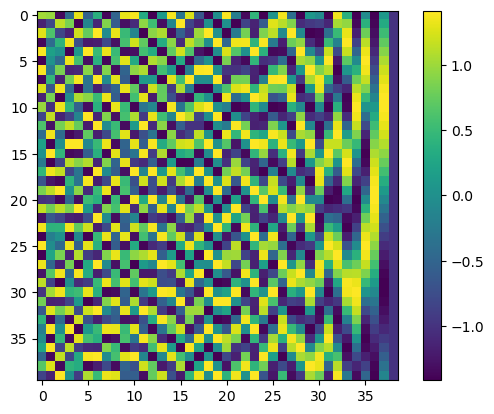

[[-0.08950651 -1.41137826 -0.71543071 ... -1.41110854 -0.09366269
  -1.        ]
 [-0.23443541  1.39464692  0.20754385 ... -1.40886848  0.1228397
  -1.        ]
 [ 0.54604388 -1.30454439  0.33043585 ... -1.37360575  0.33646284
  -1.        ]
 ...
 [ 0.96703205  1.03191522  1.40582451 ... -1.22302687 -0.71007413
  -1.        ]
 [-0.70646918 -1.22511277 -1.36140241 ... -1.31708582 -0.51505819
  -1.        ]
 [ 0.40873956  1.35385818  1.11958363 ... -1.3802734  -0.30796971
  -1.        ]]
[-9.47751362e-18  3.79100545e-17  6.49886649e-17 -6.22808038e-17
  2.70786104e-18  3.79100545e-17  7.58201090e-17  5.41572207e-18
 -2.16628883e-17 -6.49886649e-17 -6.49886649e-17 -4.40027418e-18
 -1.62471662e-17  1.08314441e-17  3.24943324e-17 -4.87414986e-17
 -3.52021935e-17  3.24943324e-17 -4.06179155e-17  7.58201090e-17
  1.89550272e-17  5.41572207e-18 -2.43707493e-17 -3.79100545e-17
  3.11404019e-17 -2.16628883e-17 -4.33257766e-17  1.62471662e-17
  2.70786104e-17  9.47751362e-17  2.70786104e-17 -8.12

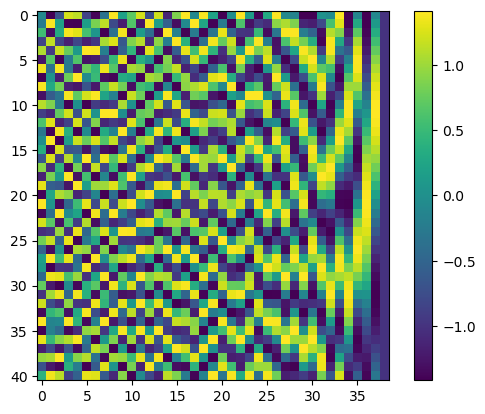

[[ 1.         -1.13619506 -0.84205748 ... -1.41417044  0.01104364
  -1.        ]
 [-1.          1.3339179   0.46974785 ... -1.39672936  0.22169146
  -1.        ]
 [ 1.         -1.41311628 -0.05569907 ... -1.34808765  0.42738706
  -1.        ]
 ...
 [-1.          0.05005898  1.41332731 ... -1.2789152  -0.60363558
  -1.        ]
 [ 1.         -0.46442054 -1.335782   ... -1.35459799 -0.40628105
  -1.        ]
 [-1.          0.8375163   1.1395466  ... -1.4000213  -0.19985087
  -1.        ]]
[-5.28677631e-18 -3.43640460e-17 -5.28677631e-18  7.93016446e-17
 -5.28677631e-17 -5.28677631e-18  2.37904934e-17  4.22942105e-17
  1.05735526e-17  5.43546689e-17  6.34413157e-17  1.58603289e-17
 -1.58603289e-17 -6.34413157e-17 -5.28677631e-18  2.11471052e-17
  1.58603289e-17  4.75809868e-17 -1.58603289e-17 -3.83291282e-17
  1.05735526e-17  1.58603289e-17  5.81545394e-17 -6.07979275e-17
 -3.17206578e-17  8.98751972e-17  5.28677631e-18 -2.64338815e-17
 -1.00448750e-16 -1.05735526e-17  1.26882631e-16  2.1

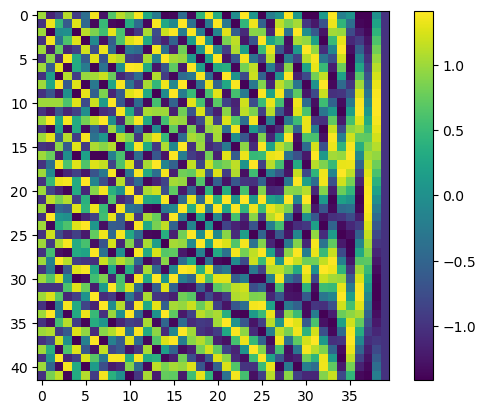

[[ 1.40782467  0.13427469 -1.39181856 ... -1.41419656 -0.00693418
  -1.        ]
 [-1.34494833 -0.43716585  1.21042986 ... -1.40013562  0.19904838
  -1.        ]
 [ 1.21771858  0.7191394  -0.86930342 ... -1.35623321  0.40078858
  -1.        ]
 ...
 [-1.19635345  0.75414749  0.85933977 ... -1.27753852 -0.60654375
  -1.        ]
 [ 1.33170616 -0.47598183 -1.20387207 ... -1.35223774 -0.41406893
  -1.        ]
 [-1.40333907  0.17504128  1.38953205 ... -1.39811636 -0.21276896
  -1.        ]]
[-7.74574203e-17 -7.87483773e-17  9.29489044e-17 -3.74377532e-17
 -7.22935923e-17  2.32372261e-17  1.03276560e-16 -1.54914841e-17
 -8.00393343e-17 -8.26212483e-17  3.09829681e-17  4.13106242e-17
 -1.26513787e-16  2.58191401e-17  8.39122053e-17 -1.03276560e-17
  2.58191401e-17  7.55209848e-17 -1.80733981e-17 -5.16382802e-18
 -5.16382802e-18  3.09829681e-17  2.32372261e-17 -3.09829681e-17
  2.58191401e-18 -3.09829681e-17  2.84010541e-17  5.16382802e-17
  1.29095701e-17  3.09829681e-17  6.84207213e-17 -6.1

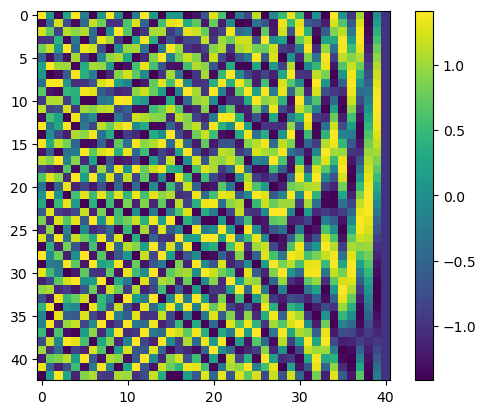

[[-0.15827825 -1.40532843  0.02239764 ... -1.41385471  0.0318568
  -1.        ]
 [ 0.3566663   1.36849887 -0.41987041 ... -1.4039974  -0.16967997
  -1.        ]
 [-0.54779364 -1.30381062  0.78332777 ... -1.36555876 -0.36776253
  -1.        ]
 ...
 [-0.43981956  1.34408287  1.05398992 ... -1.27285369  0.61631443
  -1.        ]
 [ 0.2440599  -1.39299489 -0.74564359 ... -1.34760856  0.42889527
  -1.        ]
 [-0.04333188  1.41354956  0.37688966 ... -1.39493001  0.23274504
  -1.        ]]
[ 4.16333634e-17 -1.26161707e-16  1.76626390e-17  3.53252781e-17
  3.65868951e-17 -5.04646829e-17  2.52323415e-17  5.04646829e-17
  5.04646829e-18 -5.36187256e-17  0.00000000e+00 -1.51394049e-17
  8.07434927e-17  2.52323415e-18 -2.01858732e-17  1.00929366e-17
  1.00929366e-17  2.09103174e-17 -2.01858732e-17 -7.56970244e-17
  4.03717464e-17  1.02190983e-16  3.02788098e-17 -4.16333634e-17
  6.81273220e-17 -5.04646829e-18 -1.00929366e-16 -4.03717464e-17
  1.05975834e-16  1.51394049e-17 -6.56040878e-17  3.78

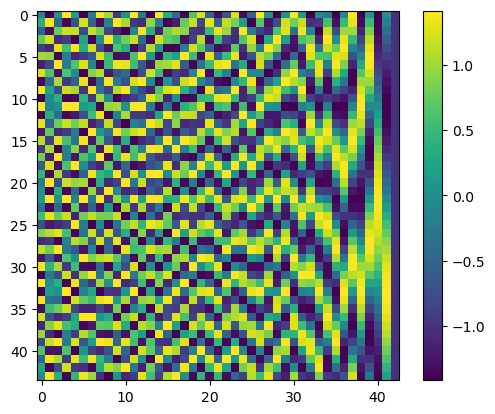

[[ 0.71638496 -1.21934105 -0.86193045 ... -1.4141729  -0.01072405
  -1.        ]
 [-0.95424549  1.04375071  1.1934206  ... -1.39891777 -0.20743452
  -1.        ]
 [ 1.15040091 -0.82254346 -1.38096662 ... -1.35643429 -0.4001075
  -1.        ]
 ...
 [ 0.13714308  1.40754814 -0.54001723 ... -1.2962731   0.56539903
  -1.        ]
 [ 0.15849954 -1.40530349  0.06041256 ... -1.36234619  0.37949026
  -1.        ]
 [-0.44721497  1.34164033  0.42647876 ... -1.40190277  0.18619514
  -1.        ]]
[-2.22044605e-17  4.93432455e-17 -1.23358114e-18 -3.94745964e-17
  3.20731096e-17  8.88178420e-17  3.94745964e-17 -4.44089210e-17
  8.38835174e-17 -5.69760288e-17  4.44089210e-17  6.16790569e-18
  7.40148683e-18  8.38835174e-17  4.93432455e-18  1.52964061e-16
 -1.35693925e-16 -4.93432455e-18  2.96059473e-17  4.19417587e-17
  2.96059473e-17 -6.41462192e-17  5.92118946e-17 -1.97372982e-17
  8.63506797e-17  3.45402719e-17 -6.16790569e-17 -2.46716228e-17
  2.71387850e-17  2.46716228e-17  7.40148683e-17  9.86

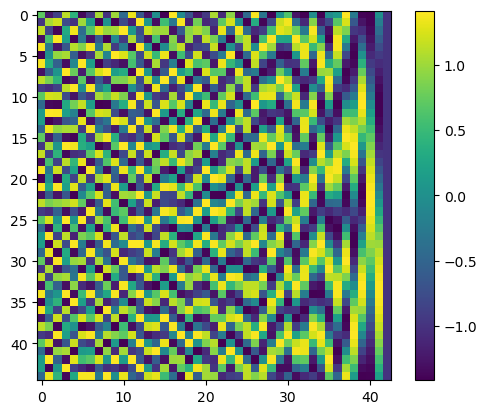

[[ 1.          0.45971662 -1.33740818 ... -1.41414132  0.0142946
  -1.        ]
 [-1.         -0.08184067  1.41184351 ... -1.40291638 -0.17839742
  -1.        ]
 [ 1.         -0.30210503 -1.38156887 ... -1.36555776 -0.36776624
  -1.        ]
 ...
 [-1.         -1.29120702  0.57687472 ... -1.29137141  0.57650661
  -1.        ]
 [ 1.          1.08768662 -0.90384612 ... -1.35784448  0.39529528
  -1.        ]
 [-1.         -0.80349749  1.1637834  ... -1.39902348  0.20672035
  -1.        ]]
[ 4.10299813e-17  2.89623398e-17  2.89623398e-17  6.87855570e-17
  2.41352831e-17  6.75787928e-17 -3.86164530e-17  0.00000000e+00
  3.86164530e-17  4.82705663e-17 -2.41352831e-17 -3.86164530e-17
 -9.65411326e-18  0.00000000e+00 -3.62029247e-18 -4.82705663e-18
  3.07724860e-17 -3.04707950e-17 -3.86164530e-17 -2.53420473e-17
 -2.41352831e-17 -6.75787928e-17  3.37893964e-17 -9.65411326e-18
 -5.79246795e-17 -1.68946982e-17 -1.44811699e-17  3.86164530e-17
 -1.68946982e-17  2.41352831e-17 -9.65411326e-18 -7.48

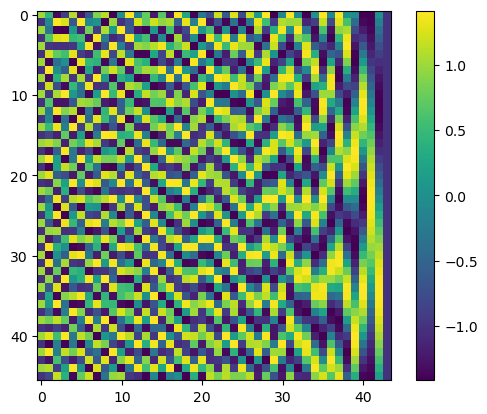

[[ 0.00241821 -1.41421149  1.31880184 ... -1.41375422  0.03604182
  -1.        ]
 [-0.28406086  1.38539143 -1.41333668 ... -1.40594388 -0.15271476
  -1.        ]
 [ 0.55431932 -1.30104961  1.35146911 ... -1.37304445 -0.33874614
  -1.        ]
 ...
 [ 0.79837522  1.16730331 -0.27920248 ... -1.28750232  0.58509638
  -1.        ]
 [-0.54986668 -1.30293769  0.71852064 ... -1.35400028  0.40826859
  -1.        ]
 [ 0.27932136  1.38635478 -1.078326   ... -1.39633607  0.22415523
  -1.        ]]
[ 5.90544162e-18  4.25191797e-17 -8.50383593e-17  0.00000000e+00
 -6.37787695e-17  1.88974132e-17 -3.77948264e-17  8.85816243e-17
  2.12595898e-17 -3.77948264e-17  1.41730599e-17 -8.03140060e-17
  5.46253350e-17  5.19678863e-17  1.41730599e-17 -1.08660126e-16
 -8.50383593e-17  6.99794832e-17  2.36217665e-17  9.44870659e-18
 -5.19678863e-17 -4.72435330e-18  1.88974132e-17 -6.37787695e-17
  2.36217665e-17 -2.36217665e-18 -1.18108832e-17  1.88974132e-17
 -1.88974132e-17  2.36217665e-18  3.07082964e-17  4.2

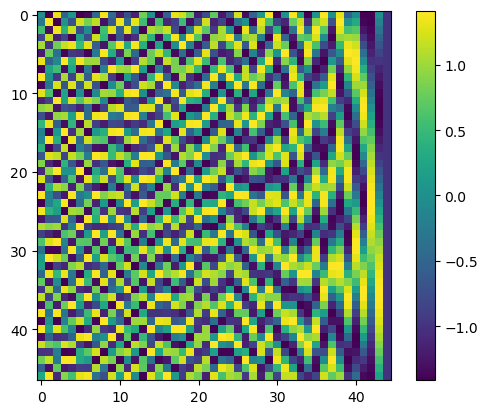

[[ 0.96299043 -1.0356879   1.10658464 ... -0.26818125 -1.38855278
  -1.        ]
 [-0.81956752  1.15252292 -1.2967968  ... -0.44712943 -1.34166884
  -1.        ]
 [ 0.66212157 -1.24963796  1.39863441 ... -0.6184271  -1.27182857
  -1.        ]
 ...
 [-1.28602775  0.58833037 -0.15978962 ...  0.28360897 -1.38548401
  -1.        ]
 [ 1.19823308 -0.75115743  0.51802641 ...  0.10034071 -1.4106494
  -1.        ]
 [-1.08993631  0.90113198 -0.84096056 ... -0.08464442 -1.41167819
  -1.        ]]
[ 7.40148683e-17  1.44560290e-19  5.49329101e-17  4.85722573e-17
 -1.03505167e-16  1.09865820e-17 -1.56125113e-17 -6.76542156e-17
  1.38777878e-17  7.40148683e-17  0.00000000e+00  0.00000000e+00
  3.58509518e-17  9.71445147e-17  5.26199454e-17  8.78926561e-17
  6.27391657e-17 -2.80446962e-17  5.60893924e-17 -1.32995466e-17
  5.95588393e-17  1.99493200e-17 -7.40148683e-17  0.00000000e+00
 -8.09537622e-18 -2.19731640e-17  2.89120579e-19  1.15648232e-18
 -4.39463281e-17  4.51028104e-17 -3.93203988e-17 -4.91

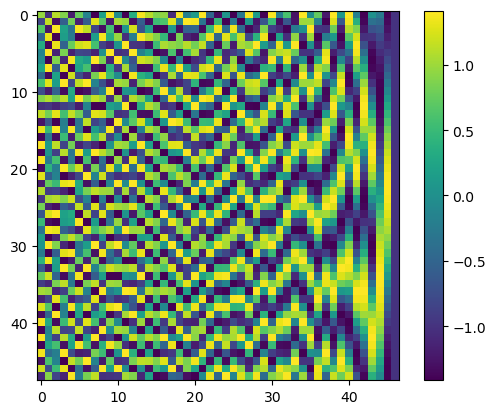

[[ 1.09010112  0.9009326  -1.29464366 ... -1.41383518 -0.03271223
  -1.        ]
 [-0.8977777  -1.09270088  1.40802346 ... -1.39804446 -0.21324089
  -1.        ]
 [ 0.67234272  1.2441685  -1.37794185 ... -1.3592979  -0.39026814
  -1.        ]
 ...
 [-1.40509096 -0.16037268  0.27391061 ... -1.32278334  0.50024418
  -1.        ]
 [ 1.34852327  0.42601054 -0.69714828 ... -1.37589311  0.32698341
  -1.        ]
 [-1.24221978 -0.6759364   1.04935455 ... -1.40641076  0.14835357
  -1.        ]]
[-6.79728382e-17 -3.62521804e-17  9.06304510e-17  7.47701221e-17
 -1.08756541e-16 -1.58603289e-17 -1.81260902e-17  2.71891353e-17
  6.79728382e-17  8.38331672e-17 -9.06304510e-18 -9.51619735e-17
 -4.98467480e-17 -1.58603289e-17  6.11755544e-17 -6.79728382e-17
  8.60989284e-17 -1.58603289e-17  5.89097931e-17  4.53152255e-18
 -9.51619735e-17 -4.53152255e-18 -7.25043608e-17  9.51619735e-17
  5.11212388e-17 -2.26576127e-17 -3.39864191e-17  5.89097931e-17
  1.35945676e-17 -9.06304510e-18 -4.53152255e-18  1.4

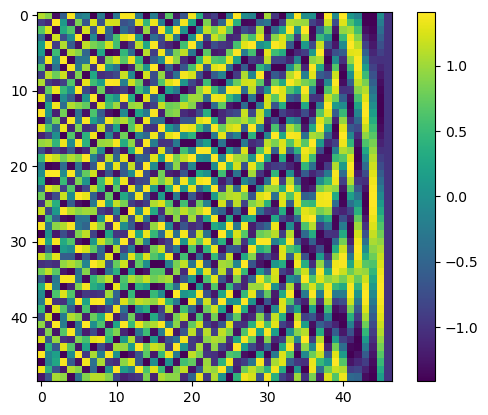

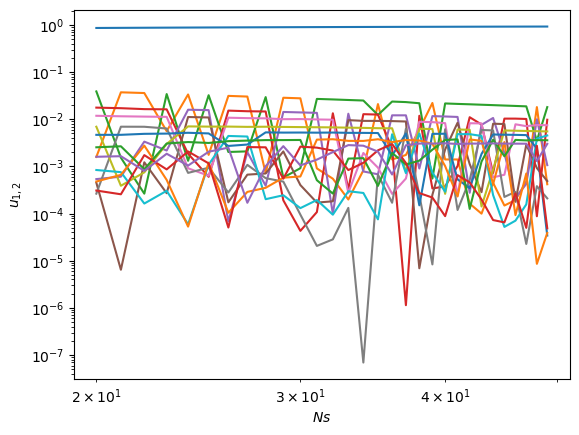

In [2]:
Ns = np.arange(20, 50, 1)
J0 = 1
beta = 10
wz = 1
alpha = 0.5


ukss = []
for N in Ns:
    J = interactions.powerlaw_pbc(N, alpha)
    J = interactions.shift(J, 0.0)
    J = J0 * interactions.rescale(J)
    ws, lams = utils.dicke_from_ising(J, 1e-6)

    gs = 0.00 * np.ones(N)
    g0 = 5
    gs[0] = g0
    M = int(np.sqrt(N) * np.log(N))
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags, uks = dicke.mag_longitudinal_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)
    uks = np.abs(uks[::-1])
    ukss.append(uks[:15])

plt.plot(Ns, ukss)
#plt.axvline(0.25, c='k', lw=0.5)
#plt.axhline(1.00, c='k', lw=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$Ns$')
plt.ylabel(r'$u_{1, 2}$')
plt.show()